In [ ]:
import pandas as pd

In [ ]:
pd.options.display.float_format = '{:.10f}'.format

df = pd.read_csv('/content/drive/MyDrive/Advertising Reloaded.csv')

df.head()

,TV,radio,newspaper,sales,extra_radio,extra_tv,social media
0,230.1000000000,37.8000000000,69.2000000000,22.1000000000,1428.8400000000,52946.0100000000,22.0120629902
1,44.5000000000,39.3000000000,45.1000000000,10.4000000000,1544.4900000000,1980.2500000000,21.9904346074
2,17.2000000000,45.9000000000,69.3000000000,9.3000000000,2106.8100000000,295.8400000000,21.9943559626
3,151.5000000000,41.3000000000,58.5000000000,18.5000000000,1705.6900000000,22952.2500000000,22.0040061965
4,180.8000000000,10.8000000000,58.4000000000,12.9000000000,116.6400000000,32688.6400000000,22.0130621145


In [ ]:
# Vamos a validar si es constante, obtenemos la varianza para todas
# las variables y buscamos las que tengan ~0

In [ ]:
# Podemos ver que social media tiene una varianza practicamente
# constante, asi que podemos borrarlo (mietras sea un valor numérico
# y no una categoria)
df.var()

,0
TV,7370.9498932161
radio,220.4277427136
newspaper,474.3083256281
sales,27.2218530151
extra_radio,541412.9767482512
extra_tv,653591180.1965916157
social media,0.0001126014


<Axes: >

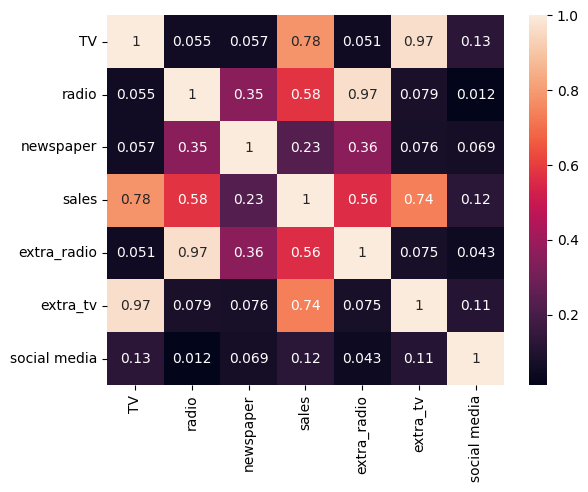

In [ ]:
import seaborn as sns

#
# Terminos de interacción
#
# Es manejable porque no hay tantas columnas
# Peeeero aun asi hay variables que se relacionan entre si y presenan
# correlación
sns.heatmap(df.corr(), annot=True)

<Axes: >

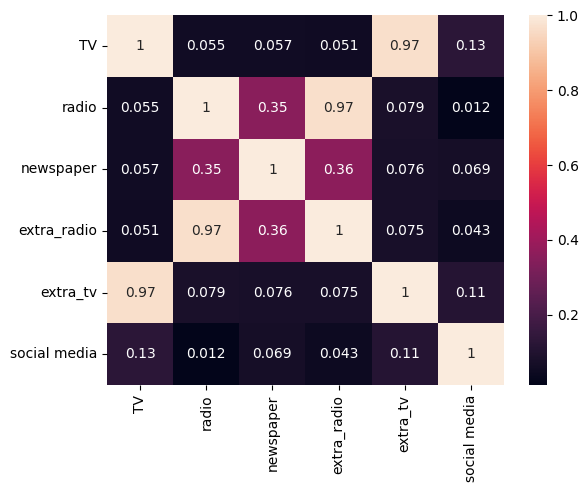

In [ ]:
# Matriz de correlación sin considerar sales
corr_matrix = df.drop(columns=['sales']).corr()

# Un umbral de +70 es que tienen una correlación muy fuerte
sns.heatmap(corr_matrix, annot=True)

In [ ]:
umbral = 0.7

pares_correlacionados = []

for col in range(len(corr_matrix.columns)):
  for col2 in range(col):
    # Vamos a tomar el valor absoluto para mantener un solo valor para el umbral
    if abs(corr_matrix.iloc[col, col2]) > umbral:
      pares_correlacionados += [(
         corr_matrix.columns[col],
         corr_matrix.columns[col2],
         corr_matrix.iloc[col, col2]
      )]

# La correlación no implica causa
for (c1, c2, cor) in pares_correlacionados:
  print(f"Correlación alta entre {c1} y {c2}: {cor}")

Correlación alta entre extra_radio y radio: 0.9667518405270887
Correlación alta entre extra_tv y TV: 0.9676624604165076


In [ ]:
# Además de r2 hay vif ara obtener qué tanto fuciona nuestro modelo
# Un vif +10 sugiere correlación
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Statsmodels no incuye no se que, asi que lo ponemos a mano
datos = sm.add_constant(df)
datos = datos.drop(columns=['sales'])

In [ ]:
vif_data = pd.DataFrame()
vif_data['Feature'] = datos.columns
vif_data['VIF'] = [
    variance_inflation_factor(datos.values, i) for i in range(datos.shape[1])
]

# El primer valor `const` podemos ignorarlo
# Un VIF de 1 quiere decir que el feature no tiene correlación con nada de lo demas
# Un VIF entre 1 y 5 sugiere colinearidad breve pero aceptable
# Mayor a 10 es problemático (la mayoría)

# Esto nos sirve para diagnosticar si hay
vif_data

,Feature,VIF
0,const,4488488.1803518469
1,TV,15.9715840034
2,radio,15.5390346356
3,newspaper,1.1597172691
4,extra_radio,15.6285613233
5,extra_tv,15.9732075585
6,social media,1.0390969565


# Multicolinealidad

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/Student_data.csv')
df2.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,9,1,91.0000000000
1,4,82,4,2,65.0000000000
2,8,51,7,2,45.0000000000
3,5,52,5,2,36.0000000000
4,7,75,8,5,66.0000000000


In [ ]:
datos = sm.add_constant(df2)
datos = datos.drop(columns=['Performance Index'])

In [ ]:
vif_data = pd.DataFrame()
vif_data['Feature'] = datos.columns
vif_data['VIF'] = [
    variance_inflation_factor(datos.values, i) for i in range(datos.shape[1])
]

# En este caso todos son 1, lo que quiere decir que no estan
# relacionadas entre si
vif_data

,Feature,VIF
0,const,37.8798916924
1,Hours Studied,1.0004636909
2,Previous Scores,1.0002544115
3,Sleep Hours,1.0000524495
4,Sample Question Papers Practiced,1.0003861708
